# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
data= pd.read_csv("C:/Users/hp/Downloads/BANK_upgrad/bank-additional/bank-additional-full.csv")

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Analysis

In [8]:
data.shape

(41188, 21)

In [9]:
y= data['y']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
y= y.replace(['yes','no'],(1,0))

In [12]:
import seaborn as sns

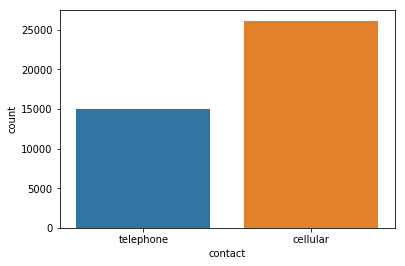

In [15]:
sns.countplot(x= data['contact'])

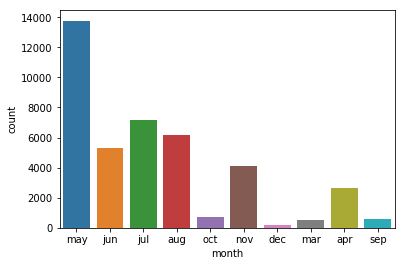

In [16]:
sns.countplot(x=data['month'])

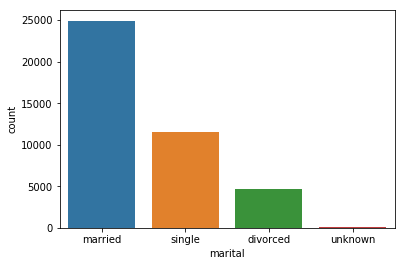

In [17]:
sns.countplot(x= data['marital'])

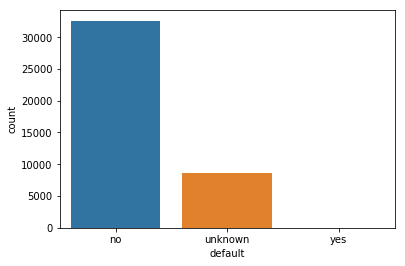

In [18]:
sns.countplot(x= data['default'])

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


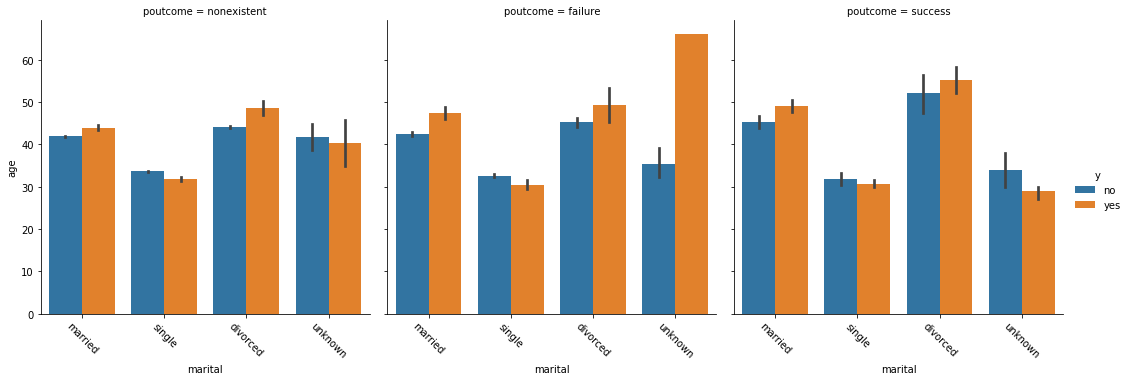

In [22]:
#factor plot
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=data, 
                   hue='y',  # Color by stage
                   col='poutcome',
                   kind = 'bar')  # Separate by stage
                   
#Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Preprocessing

There are some categorical columns in the dataset. Following function converts those categorical values into numerical values.

In [33]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome','day_of_week']
    
    for feature in features:
        la = preprocessing.LabelEncoder()
        la = la.fit(df_train[feature])
        df_train[feature] = la.transform(df_train[feature])
    return df_train

In [34]:
data= encode_features(data)

In [35]:
x= data.drop(['y'],axis=1)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

# Models

# 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf1= LogisticRegression()

In [41]:
clf1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [49]:
y_pred1= clf1.predict(x_test)

In [50]:
confusion_matrix(y_pred1,y_test)

array([[8940,  674],
       [ 226,  457]], dtype=int64)

In [51]:
accuracy_score(y_pred1,y_test)

0.9125959017189472

# 2. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf2 = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [48]:
clf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [52]:
y_pred2= clf2.predict(x_test)

In [53]:
confusion_matrix(y_pred2,y_test)

array([[8927,  651],
       [ 239,  480]], dtype=int64)

In [54]:
accuracy_score(y_pred2,y_test)

0.9135670583665145

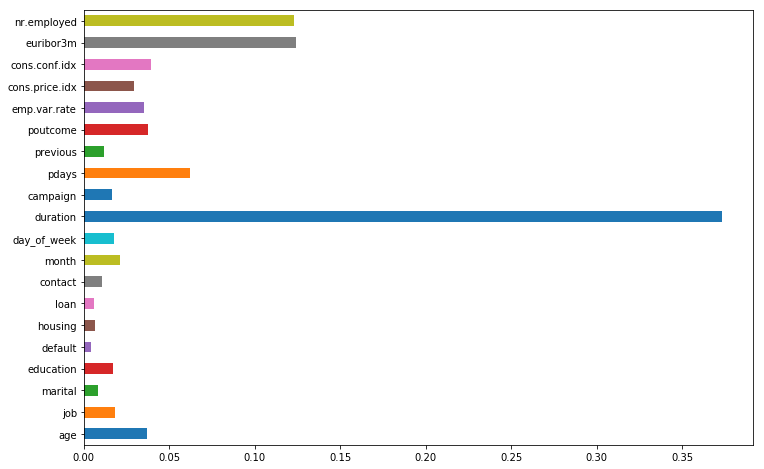

In [56]:
importances=pd.Series(clf2.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

# 3. k- Nearest Neighbours

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
clf3 = KNeighborsClassifier()

In [59]:
clf3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
y_pred3= clf3.predict(x_test)

In [61]:
confusion_matrix(y_pred3,y_test)

array([[8798,  589],
       [ 368,  542]], dtype=int64)

In [62]:
accuracy_score(y_pred3,y_test)

0.907060308827814

# Prediction on real dataset

In [63]:
test= data= pd.read_csv("C:/Users/hp/Downloads/BANK_upgrad/bank-additional/bank-additional.csv")

In [65]:
y_t= test['y']
y_t= y_t.replace(['yes','no'],(1,0))

In [66]:
x_t= test.drop(['y'],axis=1)

In [67]:
x_t= encode_features(x_t)

In [68]:
y_pred_logreg= clf1.predict(x_t)  #Logistic Regression

In [69]:
accuracy_score(y_pred_logreg,y_t)

0.9142995872784656

In [70]:
y_pred_ranfor= clf2.predict(x_t)    #Random Forest

In [71]:
accuracy_score(y_pred_ranfor,y_t)

0.9400339888322409

In [72]:
y_pred_knn= clf3.predict(x_t)       #k- Nearest Neighbours Classifier

In [73]:
accuracy_score(y_pred_knn,y_t)

0.9249817916970139